In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
import pickle

In [85]:
df = pd.read_csv('US Shale Gas.csv')
df.head(20)

,Operator,TD,TVD,TotalFluid,TotalProppant,TopPerf,BottomPerf,FluidType,LateralLength,ChokeTopDescription,...,Porosity,TotalGasBCFPerSection,Temperature,Pressure,KOP,FirstProdDate,minLateralSpacing,numOfOffsetLateralSpacingWells,EUR,IP
0,P,16098,10101,173409.2,6226000.0,10445,15916,SLKW,4051.50,0.25000,...,0.0819,75.2214,280.40,8009.190909,1400.0,2016,2631.552728,1,10500000,4311.304105
1,P,16927,10088,210602.0,7260000.0,10166,15916,SLKW,4590.00,0.25000,...,0.0819,75.2214,280.40,8009.190909,4423.5,2016,1308.706458,2,9800000,4174.570115
2,P,14511,9735,147372.7,4438660.0,10068,14300,SLKW,3212.25,0.25000,...,0.1200,189.2644,266.64,7328.196000,4548.0,2014,1512.592043,1,13800000,5208.021675
3,P,15161,9721,167104.9,5415940.0,10154,14945,SLKW,3635.25,0.21875,...,0.1200,189.2644,266.64,7328.196000,4402.0,2014,1467.752020,2,14800000,5596.057143
4,P,15153,9823,169611.9,5419180.0,10232,14905,SLKW,3570.75,0.25000,...,0.1200,190.2331,267.68,7378.914909,4502.0,2014,1468.171250,1,12300000,5024.213793
5,P,16787,9418,437934.5,17072000.0,9590,16566,SLKW,5166.75,0.40625,...,0.1179,182.0589,260.34,7023.583841,4430.5,2017,1158.577007,1,9900000,10629.713630
6,P,17223,9410,453622.0,17822000.0,9772,16998,SLKW,5495.25,0.40625,...,0.1179,182.0589,260.34,7023.583841,4429.0,2017,1134.692979,2,8600000,10629.713630
7,E,20024,10425,274057.3,16136000.0,10587,19940,GEL,7119.00,0.31250,...,0.1032,74.2817,272.94,7637.318386,1181.0,2016,1291.893014,1,11700000,9869.911330
8,E,21594,10478,305436.4,19312000.0,10240,21075,GEL,8415.00,0.31250,...,0.1032,74.2817,272.94,7637.318386,1181.5,2016,1291.893014,1,13800000,10551.611170
9,P,19817,12564,369248.0,9232000.0,12560,19631,SLKW,5353.50,0.40625,...,0.0596,55.1841,316.48,9896.994909,5869.0,2017,1268.922403,2,14200000,13864.376680


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Operator                        185 non-null    object 
 1   TD                              185 non-null    int64  
 2   TVD                             185 non-null    int64  
 3   TotalFluid                      180 non-null    float64
 4   TotalProppant                   182 non-null    float64
 5   TopPerf                         185 non-null    int64  
 6   BottomPerf                      185 non-null    int64  
 7   FluidType                       180 non-null    object 
 8   LateralLength                   184 non-null    float64
 9   ChokeTopDescription             185 non-null    float64
 10  MaxFlowingPSI                   185 non-null    int64  
 11  MaxShutinPSI                    177 non-null    float64
 12  FlowGas                         185 

In [87]:
df.nunique()

Operator                            4
TD                                181
TVD                               171
TotalFluid                        180
TotalProppant                     179
TopPerf                           174
BottomPerf                        173
FluidType                           2
LateralLength                     181
ChokeTopDescription                21
MaxFlowingPSI                     176
MaxShutinPSI                      168
FlowGas                           185
FlowWater                         156
SurfaceX                          185
SurfaceY                          185
Z_BelowSurface                     76
Isopach                            59
Porosity                           70
TotalGasBCFPerSection              83
Temperature                        76
Pressure                           76
KOP                               173
FirstProdDate                       5
minLateralSpacing                 104
numOfOffsetLateralSpacingWells      3
EUR         

Before starting, let's first drop some irrelevant columns.  Looking at the data model in [Paper 1](https://www.hindawi.com/journals/cin/2022/7084514/), we can **drop the following columns: Operator, FluidType, FirstProdDate, numOfOffsetLateralSpacingWells, and ChokeTopDescription** to begin with, as these were not found to be very effective in the mentioned paper.  Moreover, these suggest classifications which are not very useful in regression models.

In [88]:
df.drop(columns=['Operator',
                 'FluidType',
                 'ChokeTopDescription',
                 'numOfOffsetLateralSpacingWells',
                 'FirstProdDate'
                ], inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TD                     185 non-null    int64  
 1   TVD                    185 non-null    int64  
 2   TotalFluid             180 non-null    float64
 3   TotalProppant          182 non-null    float64
 4   TopPerf                185 non-null    int64  
 5   BottomPerf             185 non-null    int64  
 6   LateralLength          184 non-null    float64
 7   MaxFlowingPSI          185 non-null    int64  
 8   MaxShutinPSI           177 non-null    float64
 9   FlowGas                185 non-null    int64  
 10  FlowWater              183 non-null    float64
 11  SurfaceX               185 non-null    float64
 12  SurfaceY               185 non-null    float64
 13  Z_BelowSurface         185 non-null    int64  
 14  Isopach                185 non-null    int64  
 15  Porosi

In [90]:
df.isnull().sum()

TD                        0
TVD                       0
TotalFluid                5
TotalProppant             3
TopPerf                   0
BottomPerf                0
LateralLength             1
MaxFlowingPSI             0
MaxShutinPSI              8
FlowGas                   0
FlowWater                 2
SurfaceX                  0
SurfaceY                  0
Z_BelowSurface            0
Isopach                   0
Porosity                  0
TotalGasBCFPerSection     0
Temperature               0
Pressure                  0
KOP                       3
minLateralSpacing        26
EUR                       0
IP                        0
dtype: int64

## Imputing the null values using KNN Imputer

Replacing the null values using the KNN Imputer.  Simple imputation using mean, median takes only one feature into account, whereas KNN Imputer takes into account many features.

In [91]:
imputer = KNNImputer(n_neighbors=3)
df_values = imputer.fit_transform(df)

In [92]:
df_imputed = pd.DataFrame(df_values, columns=df.columns)

In [93]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TD                     185 non-null    float64
 1   TVD                    185 non-null    float64
 2   TotalFluid             185 non-null    float64
 3   TotalProppant          185 non-null    float64
 4   TopPerf                185 non-null    float64
 5   BottomPerf             185 non-null    float64
 6   LateralLength          185 non-null    float64
 7   MaxFlowingPSI          185 non-null    float64
 8   MaxShutinPSI           185 non-null    float64
 9   FlowGas                185 non-null    float64
 10  FlowWater              185 non-null    float64
 11  SurfaceX               185 non-null    float64
 12  SurfaceY               185 non-null    float64
 13  Z_BelowSurface         185 non-null    float64
 14  Isopach                185 non-null    float64
 15  Porosi

In [94]:
df.duplicated().sum()

0

There are no duplicates, we can go ahead and start looking at the distribution of each attribute to look for any anomalies in the data.

## Looking at the outliers

Plotting boxplots for every feature to see if there are any outliers present in the imputed dataset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

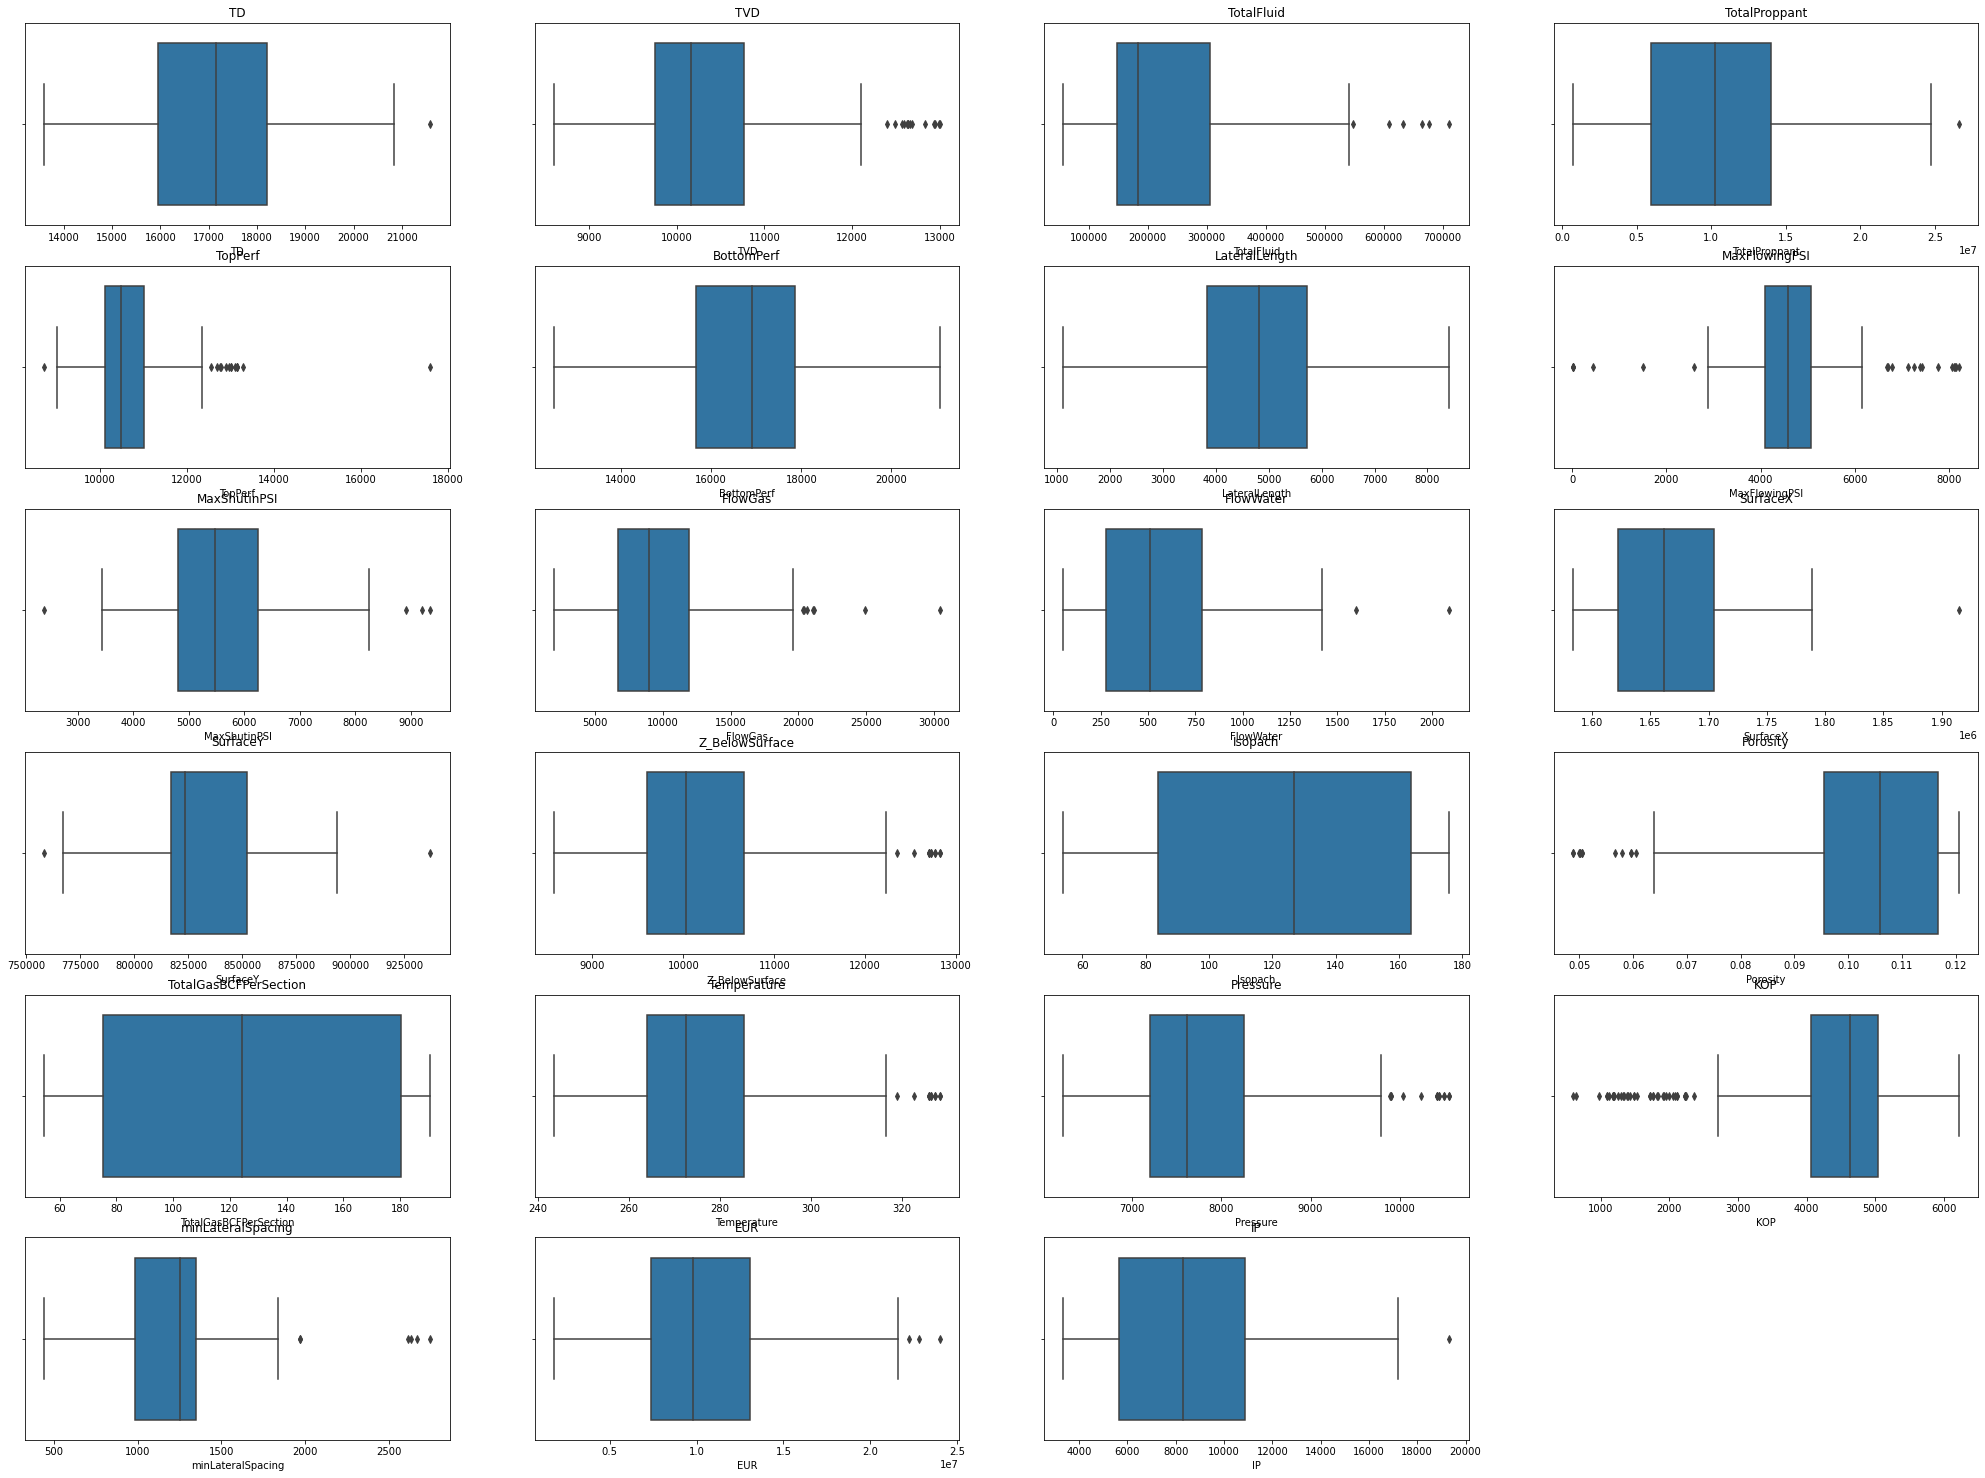

In [95]:
plt.figure(figsize=(35,35))
for i, col in enumerate(df_imputed.columns):
    plt.subplot(8, 4, i+1)
    sns.boxplot(df_imputed[col]);
    plt.title(col)

Clearly there are outliers present in many columns.  We'll only consider 80% of the dataset, that is, remove outliers that are beyond 80% of the distribution of an attribute.  To achieve this, Isolation Forest algorithm is used.

In [96]:
model = IsolationForest(contamination=0.2, max_features=1.0)
model.fit(df_imputed)
df_imputed1 = df_imputed.copy()
df_imputed1['anomaly_score']=model.decision_function(df_imputed)
df_imputed1['anomaly']=model.predict(df_imputed)
df_imputed1.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,TD,TVD,TotalFluid,TotalProppant,TopPerf,BottomPerf,LateralLength,MaxFlowingPSI,MaxShutinPSI,FlowGas,...,Porosity,TotalGasBCFPerSection,Temperature,Pressure,KOP,minLateralSpacing,EUR,IP,anomaly_score,anomaly
0,16098.0,10101.0,173409.200000,6226000.0,10445.0,15916.0,4051.50,4342.0,6382.000000,4763.0,...,0.0819,75.2214,280.40,8009.190909,1400.0,2631.552728,10500000.0,4311.304105,-0.020557,-1
1,16927.0,10088.0,210602.000000,7260000.0,10166.0,15916.0,4590.00,4727.0,6555.000000,3201.0,...,0.0819,75.2214,280.40,8009.190909,4423.5,1308.706458,9800000.0,4174.570115,0.030903,1
2,14511.0,9735.0,147372.700000,4438660.0,10068.0,14300.0,3212.25,4622.0,4830.000000,7324.0,...,0.1200,189.2644,266.64,7328.196000,4548.0,1512.592043,13800000.0,5208.021675,0.037820,1
3,15161.0,9721.0,167104.900000,5415940.0,10154.0,14945.0,3635.25,4742.0,4955.000000,7745.0,...,0.1200,189.2644,266.64,7328.196000,4402.0,1467.752020,14800000.0,5596.057143,0.056997,1
4,15153.0,9823.0,169611.900000,5419180.0,10232.0,14905.0,3570.75,4869.0,4963.000000,6974.0,...,0.1200,190.2331,267.68,7378.914909,4502.0,1468.171250,12300000.0,5024.213793,0.062832,1
5,16787.0,9418.0,437934.500000,17072000.0,9590.0,16566.0,5166.75,3741.0,4350.000000,11558.0,...,0.1179,182.0589,260.34,7023.583841,4430.5,1158.577007,9900000.0,10629.713630,0.038820,1
6,17223.0,9410.0,453622.000000,17822000.0,9772.0,16998.0,5495.25,3759.0,4300.000000,11396.0,...,0.1179,182.0589,260.34,7023.583841,4429.0,1134.692979,8600000.0,10629.713630,0.041489,1
7,20024.0,10425.0,274057.300000,16136000.0,10587.0,19940.0,7119.00,5704.0,5815.000000,8750.0,...,0.1032,74.2817,272.94,7637.318386,1181.0,1291.893014,11700000.0,9869.911330,0.017132,1
8,21594.0,10478.0,305436.400000,19312000.0,10240.0,21075.0,8415.00,5874.0,5915.000000,8711.0,...,0.1032,74.2817,272.94,7637.318386,1181.5,1291.893014,13800000.0,10551.611170,-0.052192,-1
9,19817.0,12564.0,369248.000000,9232000.0,12560.0,19631.0,5353.50,5270.0,7287.000000,14194.0,...,0.0596,55.1841,316.48,9896.994909,5869.0,1268.922403,14200000.0,13864.376680,-0.073742,-1


In [97]:
df_imputed1.anomaly.value_counts()

 1    148
-1     37
Name: anomaly, dtype: int64

Isolation Forest has identified **37 anomalies.** Now removing these anomalies.

In [98]:
df_imputed.drop(index=df_imputed1[df_imputed1['anomaly']==-1].index, inplace=True)
df_imputed.shape

(148, 23)

Creating a new feature:

In [99]:
# Creating a new feature:
df_imputed["DiffPerf"] = df_imputed["BottomPerf"] - df_imputed["TopPerf"]

The anomalies are now removed from the imputed data. Now we can go ahead and start **extracting the relevant features** for **IP prediction.**  We'll take look at the **correlation heatmap** and choose those features whose **magnitude of correlation with IP is greater than 0.2.**

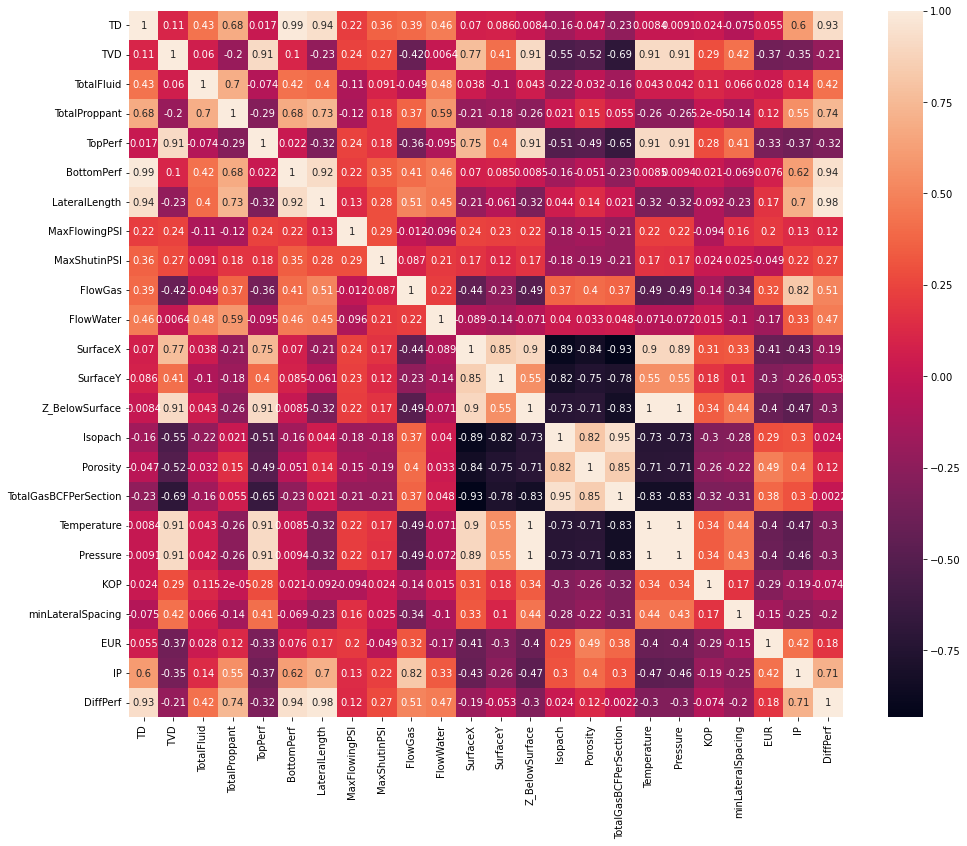

In [100]:
plt.figure(figsize=(16,13))
sns.heatmap(df_imputed.corr(),annot=True);

Based on the above heatmap, the unimportant features for **IP Prediction** are:
- TotalFluid
- MaxFlowingPSI
- KOP

The unimportant features for **EUR Prediction** are:
- TD
- TotalFluid
- TotalProppant
- BottomPerf
- LateralLength
- MaxFlowingPSI
- MaxShutInPSI
- FlowWater
- minLateralSpacing

Dropping the above features for both the predictions:

In [101]:
# Now separating the independent and dependent variables:
Xi = df_imputed.drop(columns=['IP',
                              'EUR',
                              'TopPerf',
                              'BottomPerf',
                              'TotalFluid',
                              'MaxFlowingPSI',
                              'KOP'])
# Xi = df_imputed.drop(columns=['IP','EUR'])
yi = df_imputed[['IP']]
print('Shape of Xi is',Xi.shape,'while shape of yi is',yi.shape)
Xe = df_imputed.drop(columns=['TD',
                              'TotalFluid',
                              'TotalProppant',
                              'LateralLength',
                              'MaxFlowingPSI',
                              'MaxShutinPSI',
                              'FlowWater',
                              'minLateralSpacing',
                              'EUR',
                              'DiffPerf',
                              'BottomPerf'])
# Xe = df_imputed.drop(columns=['EUR'])
ye = df_imputed[['EUR']]
print('Shape of Xe is',Xe.shape,'while shape of ye is',ye.shape)

Shape of Xi is (148, 17) while shape of yi is (148, 1)
Shape of Xe is (148, 13) while shape of ye is (148, 1)


The independent variables are now stored in $X$, while dependent variables are stored in $y$.  Splitting the datasets for prediction ($X$, $y$) into train and test data.

In [102]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.2, random_state=101)
Xi_train.head()

,TD,TVD,TotalProppant,LateralLength,MaxShutinPSI,FlowGas,FlowWater,SurfaceX,SurfaceY,Z_BelowSurface,Isopach,Porosity,TotalGasBCFPerSection,Temperature,Pressure,minLateralSpacing,DiffPerf
93,15753.0,10896.0,5043900.0,3216.00,4853.0,6454.0,432.0,1704706.466,844626.6542,11000.0,82.0,0.1003,71.3059,292.00,8600.000000,1292.525289,4315.0
182,14975.0,10489.0,8898000.0,3200.25,6083.0,9723.0,969.0,1641272.987,812239.9857,10081.0,161.0,0.1112,175.3190,273.62,7670.953659,1455.863095,4257.0
95,17940.0,9579.0,19270000.0,5916.75,4792.0,9864.0,715.0,1613447.676,793714.6000,9600.0,128.0,0.1193,175.4669,264.00,7200.000000,1147.474180,7877.0
97,16980.0,9426.0,9448000.0,5128.50,4937.0,14944.0,696.0,1616866.598,817449.9534,9500.0,167.0,0.1136,179.6027,262.00,7103.409091,987.803184,6661.0
58,17742.0,9848.0,10606000.0,5842.50,5508.0,15256.0,699.0,1619479.913,819039.3007,9551.0,164.0,0.1141,180.4167,263.02,7152.613659,978.514721,7741.0


Scaling the training and testing dataset for IP prediction

In [103]:
scaler = RobustScaler()
Xi_train_s = scaler.fit_transform(Xi_train)
Xi_test_s = scaler.transform(Xi_test)

# IP Prediction

## Elastic Net regressor

In [104]:
linear_model = ElasticNet()
param_grid_linear_model = {
    'alpha': [0.1, 1, 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.]
}
grid_model_linear = GridSearchCV(
                                estimator=linear_model,
                                param_grid=param_grid_linear_model,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=1
                    )
grid_model_linear.fit(Xi_train_s, yi_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.873e+06, tolerance: 9.691e+04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+06, tolerance: 9.436e+04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.925e+06, toleranc

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [105]:
grid_model_linear.best_params_

{'alpha': 50, 'l1_ratio': 1.0}

In [106]:
y_pred_elastic_test = grid_model_linear.predict(Xi_test_s)
y_pred_elastic_train = grid_model_linear.predict(Xi_train_s)

Now printing the scores for the above model.

In [107]:
mae_elastic = mean_absolute_error(yi_test, y_pred_elastic_test)
mse_elastic = mean_squared_error(yi_test, y_pred_elastic_test)
rmse_elastic = np.sqrt(mse_elastic)
print("Mean absolute error for Elastic: %.3f\nRoot mean squared error for Elastic: %.3f" % (mae_elastic,rmse_elastic))

Mean absolute error for Elastic: 1184.674
Root mean squared error for Elastic: 1601.836


Now using the above obtained parameters into the actual model definition, and obtaining the relevant contribution of each column:

In [108]:
model = ElasticNet(alpha=10, l1_ratio=0.99)
model.fit(Xi_train_s, yi_train)

ElasticNet(alpha=10, l1_ratio=0.99)

Now printing the contribution of each coefficient for this model:

In [109]:
coeff = model.coef_
pd.DataFrame({'Attribute':Xi_train.columns, 'IP_coefficient': coeff[:]})
# for i in np.arange(coeff.shape[1]):
#     print(X_train.columns[i],'\t', coeff[0][i],'\t', coeff[1][i])

,Attribute,IP_coefficient
0,TD,729.226724
1,TVD,0.000000
2,TotalProppant,274.594497
3,LateralLength,500.956316
4,MaxShutinPSI,417.053109
5,FlowGas,1591.566555
6,FlowWater,-86.904928
7,SurfaceX,-145.587209
8,SurfaceY,0.000000
9,Z_BelowSurface,-151.924632


**The most important predictors of IP are:**

- FlowGas
- TD
- DiffPerf
- Porosity
- MaxShutinPSI
- LateralLength
- TotalProppant

We notice that **Total Proppant volume does play a moderate role in the calculation of Initial production.**  It's a positive contribution, implying as Total proppant volume increases so does the initial production.  This was also shown in the heat map (through a positive correlation coefficient greater than 0.5.

## KNN Regressor

In [110]:
knn_model = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': np.arange(1,21),
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}
# Now optimizing the hyperparameters of the KNN
grid_model_knn = GridSearchCV(
                                estimator=knn_model,
                                param_grid=param_grid_knn,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=1
                            )
grid_model_knn.fit(Xi_train_s,yi_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_mean_squared_error', verbose=1)

In [111]:
grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [112]:
grid_model_knn.best_score_

-1810674.2820981618

In [113]:
y_pred_knn_test = grid_model_knn.predict(Xi_test_s)
y_pred_knn_train = grid_model_knn.predict(Xi_train_s)

In [114]:
mae_knn = mean_absolute_error(yi_test, y_pred_knn_test)
mse_knn = mean_squared_error(yi_test, y_pred_knn_test)
rmse_knn = np.sqrt(mse_knn)
print("Mean absolute error for KNN: %.3f\nRoot mean squared error for KNN: %.3f" % (mae_knn,rmse_knn))

Mean absolute error for KNN: 1344.737
Root mean squared error for KNN: 2213.305


In [115]:
# Printing the scores:
print("KNN score for training data:",grid_model_knn.score(Xi_train_s, y_pred_knn_train))
print("KNN score for testing data:",grid_model_knn.score(Xi_test_s, y_pred_knn_test))

KNN score for training data: -0.0
KNN score for testing data: -0.0


## SVR Regressor

In [116]:
svr_reg = SVR()
param_grid_svm = {'C': [0.001,0.01,0.1,0.5,1]}
grid_model_svm = GridSearchCV(estimator=svr_reg,
                          param_grid=param_grid_svm,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)
grid_model_svm.fit(Xi_train_s, yi_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [117]:
y_pred_svm = grid_model_svm.predict(Xi_test_s)
print("Mean absolute error for SVM: %.3f\nRoot mean squared error for SVM: %.3f" % (mean_absolute_error(yi_test, y_pred_svm),np.sqrt(mean_squared_error(yi_test, y_pred_svm))))

Mean absolute error for SVM: 3032.620
Root mean squared error for SVM: 3603.823


## Random Forest Regressor

In [118]:
rf_model = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'bootstrap': [True, False],
    'min_samples_split' : [2,4,8]
}
grid_model_rf = GridSearchCV(estimator=rf_model,
                          param_grid=param_grid_rf,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)
grid_model_rf.fit(Xi_train_s, yi_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [119]:
grid_model_rf.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 30}

In [121]:
y_pred_rf = grid_model_rf.predict(Xi_test_s)
print("Mean absolute error for Random Forest: %.3f\nRoot mean squared error for Random Forest: %.3f" % (mean_absolute_error(yi_test, y_pred_rf),np.sqrt(mean_squared_error(yi_test, y_pred_rf))))

Mean absolute error for Random Forest: 1073.475
Root mean squared error for Random Forest: 1789.797


## Gradient Boosting

In [122]:
# grb_model = MultiOutputRegressor(GradientBoostingRegressor())
grb_model = GradientBoostingRegressor()
# param_grid_grb = {
#     'estimator__learning_rate': [0.01,0.02],
#     'estimator__subsample':[0.1,0.2,0.5],
#     'estimator__n_estimators':[100,500],
#     'estimator__max_depth':[4,6,8]
# }
param_grid_grb = {
    'learning_rate': [0.01,0.02],
    'subsample':[0.1,0.2,0.5],
    'n_estimators':[100,500],
    'max_depth':[4,6,8]
}
grid_model_grb = GridSearchCV(
                                estimator=grb_model,
                                param_grid=param_grid_grb,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=1)
grid_model_grb.fit(Xi_train_s, yi_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500],
                         'subsample': [0.1, 0.2, 0.5]},
             scoring='neg_mean_squared_error', verbose=1)

In [123]:
grid_model_grb.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

In [124]:
y_pred_grb = grid_model_grb.predict(Xi_test_s)
print("Mean absolute error for GRB: %.3f\nRoot mean squared error for GRB: %.3f" % (mean_absolute_error(yi_test, y_pred_grb),np.sqrt(mean_squared_error(yi_test, y_pred_grb))))

Mean absolute error for GRB: 1185.825
Root mean squared error for GRB: 1949.543


We have tested 5 models for predicting IP, summarising these:

In [125]:
x={
    "Model":['ElasticNet','KNN','SVR','RandomForest','GradientBoosting'],
    'MAE':[
            mean_absolute_error(yi_test, y_pred_elastic_test),
            mean_absolute_error(yi_test, y_pred_knn_test),
            mean_absolute_error(yi_test, y_pred_svm),
            mean_absolute_error(yi_test, y_pred_rf),
            mean_absolute_error(yi_test, y_pred_grb)
          ],
    "RMSE":[
        np.sqrt(mean_squared_error(yi_test, y_pred_elastic_test)),
        np.sqrt(mean_squared_error(yi_test, y_pred_knn_test)),
        np.sqrt(mean_squared_error(yi_test, y_pred_svm)),
        np.sqrt(mean_squared_error(yi_test, y_pred_rf)),
        np.sqrt(mean_squared_error(yi_test, y_pred_grb))
    ]
}
pd.DataFrame(x)

,Model,MAE,RMSE
0,ElasticNet,1184.673861,1601.836030
1,KNN,1344.736915,2213.305235
2,SVR,3032.620224,3603.823211
3,RandomForest,1073.475491,1789.797036
4,GradientBoosting,1185.825465,1949.543408


**Clearly, SVR performs the worst out of the five. Discarding SVR for the voting ensemble.**

## Voting regressor

In [126]:
vr = VotingRegressor([('en',grid_model_linear),('knn',grid_model_knn), ('rf',grid_model_rf),('grb',grid_model_grb)])
vr.fit(Xi_train_s, yi_train)
y_pred_vr=vr.predict(Xi_test_s)
print("Mean absolute error for Voting regressor: %.3f\nRoot mean squared error for Voting regressor: %.3f" % (mean_absolute_error(yi_test, y_pred_vr),np.sqrt(mean_squared_error(yi_test, y_pred_vr))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.873e+06, tolerance: 9.691e+04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+06, tolerance: 9.436e+04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\si

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.816e+06, tolerance: 9.691e+04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.461e+06, tolerance: 9.352e+04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.349e+07, toleranc

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mean absolute error for Voting regressor: 1127.931
Root mean squared error for Voting regressor: 1868.162


# EUR Prediction

## Elastic Net regressor

In [127]:
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye, test_size=0.2, random_state=101)
Xe_train.head()

,TVD,TopPerf,FlowGas,SurfaceX,SurfaceY,Z_BelowSurface,Isopach,Porosity,TotalGasBCFPerSection,Temperature,Pressure,KOP,IP
93,10896.0,11290.0,6454.0,1704706.466,844626.6542,11000.0,82.0,0.1003,71.3059,292.00,8600.000000,5167.5,5258.145484
182,10489.0,10543.0,9723.0,1641272.987,812239.9857,10081.0,161.0,0.1112,175.3190,273.62,7670.953659,4833.0,5700.527422
95,9579.0,9846.0,9864.0,1613447.676,793714.6000,9600.0,128.0,0.1193,175.4669,264.00,7200.000000,4506.5,10124.169130
97,9426.0,10225.0,14944.0,1616866.598,817449.9534,9500.0,167.0,0.1136,179.6027,262.00,7103.409091,4600.5,9943.906732
58,9848.0,9829.0,15256.0,1619479.913,819039.3007,9551.0,164.0,0.1141,180.4167,263.02,7152.613659,1534.5,13989.478160


In [128]:
scaler = RobustScaler()
Xe_train_s = scaler.fit_transform(Xe_train)
Xe_test_s = scaler.transform(Xe_test)

In [129]:
linear_model = ElasticNet()
param_grid_linear_model = {
    'alpha': [0.1, 1, 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.]
}
grid_model_linear = GridSearchCV(
                                estimator=linear_model,
                                param_grid=param_grid_linear_model,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=1
                    )
grid_model_linear.fit(Xe_train_s, ye_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.472e+14, tolerance: 1.343e+11
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.022e+14, tolerance: 1.514e+11
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.877e+14, toleranc

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [130]:
grid_model_linear.best_params_

{'alpha': 0.1, 'l1_ratio': 0.95}

In [131]:
y_pred_elastic_test = grid_model_linear.predict(Xe_test_s)
y_pred_elastic_train = grid_model_linear.predict(Xe_train_s)

Now printing the scores for the above model.

In [132]:
mae_elastic = mean_absolute_error(ye_test, y_pred_elastic_test)
mse_elastic = mean_squared_error(ye_test, y_pred_elastic_test)
rmse_elastic = np.sqrt(mse_elastic)
print("Mean absolute error for Elastic: %.3f\nRoot mean squared error for Elastic: %.3f" % (mae_elastic,rmse_elastic))

Mean absolute error for Elastic: 2919387.753
Root mean squared error for Elastic: 3534386.546


## KNN Regressor

In [133]:
knn_model = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': np.arange(1,21),
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}
# Now optimizing the hyperparameters of the KNN
grid_model_knn = GridSearchCV(
                                estimator=knn_model,
                                param_grid=param_grid_knn,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=1
                            )
grid_model_knn.fit(Xe_train_s,ye_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_mean_squared_error', verbose=1)

In [134]:
grid_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [135]:
grid_model_knn.best_score_

-7630626811594.203

In [136]:
y_pred_knn_test = grid_model_knn.predict(Xe_test_s)
y_pred_knn_train = grid_model_knn.predict(Xe_train_s)

In [137]:
mae_knn = mean_absolute_error(ye_test, y_pred_knn_test)
mse_knn = mean_squared_error(ye_test, y_pred_knn_test)
rmse_knn = np.sqrt(mse_knn)
print("Mean absolute error for KNN: %.3f\nRoot mean squared error for KNN: %.3f" % (mae_knn,rmse_knn))

Mean absolute error for KNN: 3076666.667
Root mean squared error for KNN: 4064275.253


In [138]:
# Printing the scores:
print("KNN score for training data:",grid_model_knn.score(Xe_train_s, y_pred_knn_train))
print("KNN score for testing data:",grid_model_knn.score(Xe_test_s, y_pred_knn_test))

KNN score for training data: -0.0
KNN score for testing data: -0.0


## SVR Regressor

In [139]:
svr_reg = SVR()
param_grid_svm = {'C': [0.001,0.01,0.1,0.5,1]}
grid_model_svm = GridSearchCV(estimator=svr_reg,
                          param_grid=param_grid_svm,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)
grid_model_svm.fit(Xe_train_s, ye_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [140]:
y_pred_svm = grid_model_svm.predict(Xe_test_s)
print("Mean absolute error for SVM: %.3f\nRoot mean squared error for SVM: %.3f" % (mean_absolute_error(ye_test, y_pred_svm),np.sqrt(mean_squared_error(ye_test, y_pred_svm))))

Mean absolute error for SVM: 3289994.570
Root mean squared error for SVM: 3963369.111


## Random Forest Regressor

In [141]:
rf_model = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'bootstrap': [True, False],
    'min_samples_split' : [2,4,8]
}
grid_model_rf = GridSearchCV(estimator=rf_model,
                          param_grid=param_grid_rf,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)
grid_model_rf.fit(Xe_train_s, ye_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [142]:
grid_model_rf.best_params_

{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 30}

In [143]:
y_pred_rf = grid_model_rf.predict(Xe_test_s)
print("Mean absolute error for Random Forest: %.3f\nRoot mean squared error for Random Forest: %.3f" % (mean_absolute_error(ye_test, y_pred_rf),np.sqrt(mean_squared_error(ye_test, y_pred_rf))))

Mean absolute error for Random Forest: 2315116.348
Root mean squared error for Random Forest: 3006024.910


## Gradient Boosting

In [144]:
# grb_model = MultiOutputRegressor(GradientBoostingRegressor())
grb_model = GradientBoostingRegressor()
# param_grid_grb = {
#     'estimator__learning_rate': [0.01,0.02],
#     'estimator__subsample':[0.1,0.2,0.5],
#     'estimator__n_estimators':[100,500],
#     'estimator__max_depth':[4,6,8]
# }
param_grid_grb = {
    'learning_rate': [0.01,0.02],
    'subsample':[0.1,0.2,0.5],
    'n_estimators':[100,500],
    'max_depth':[4,6,8]
}
grid_model_grb = GridSearchCV(
                                estimator=grb_model,
                                param_grid=param_grid_grb,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=1)
grid_model_grb.fit(Xe_train_s, ye_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500],
                         'subsample': [0.1, 0.2, 0.5]},
             scoring='neg_mean_squared_error', verbose=1)

In [145]:
grid_model_grb.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [146]:
y_pred_grb = grid_model_grb.predict(Xe_test_s)
print("Mean absolute error for GRB: %.3f\nRoot mean squared error for GRB: %.3f" % (mean_absolute_error(ye_test, y_pred_grb),np.sqrt(mean_squared_error(ye_test, y_pred_grb))))

Mean absolute error for GRB: 2301772.762
Root mean squared error for GRB: 2983973.189


In [147]:
x={
    "Model":['ElasticNet','KNN','SVR','RandomForest','GradientBoosting'],
    'MAE':[
            mean_absolute_error(ye_test, y_pred_elastic_test),
            mean_absolute_error(ye_test, y_pred_knn_test),
            mean_absolute_error(ye_test, y_pred_svm),
            mean_absolute_error(ye_test, y_pred_rf),
            mean_absolute_error(ye_test, y_pred_grb)
          ],
    "RMSE":[
        np.sqrt(mean_squared_error(ye_test, y_pred_elastic_test)),
        np.sqrt(mean_squared_error(ye_test, y_pred_knn_test)),
        np.sqrt(mean_squared_error(ye_test, y_pred_svm)),
        np.sqrt(mean_squared_error(ye_test, y_pred_rf)),
        np.sqrt(mean_squared_error(ye_test, y_pred_grb))
    ]
}
pd.DataFrame(x)

,Model,MAE,RMSE
0,ElasticNet,2.919388e+06,3.534387e+06
1,KNN,3.076667e+06,4.064275e+06
2,SVR,3.289995e+06,3.963369e+06
3,RandomForest,2.315116e+06,3.006025e+06
4,GradientBoosting,2.301773e+06,2.983973e+06


**Best model: GradientBoosting**

## Creating a pipeline for feature transformation and model building for EUR Prediction

In [67]:
def remove_unimportant_columns(dataframe):
    dataframe["DiffPerf"] =dataframe["BottomPerf"]-dataframe["TopPerf"]
    dataframe = dataframe.drop(columns=[
        'Operator',
        'FluidType',
        'ChokeTopDescription',
        'numOfOffsetLateralSpacingWells',
        'FirstProdDate',
        'TopPerf',
        'BottomPerf'
    ], inplace=False)
    return dataframe

In [68]:
def impute_null_values(dataframe):
    imputer = KNNImputer(n_neighbors=3)
    values = imputer.fit_transform(dataframe)
    dataframe = pd.DataFrame(values, columns=dataframe.columns)
    return dataframe

In [69]:
def treat_outliers(dataframe):
    model = IsolationForest(contamination=0.2, max_features=1.0)
    model.fit(dataframe)
    dataframe1 = dataframe.copy()
    dataframe1['anomaly_score']=model.decision_function(dataframe)
    dataframe1['anomaly']=model.predict(dataframe)
    dataframe = dataframe.drop(index=dataframe1[dataframe1['anomaly']==-1].index, inplace=False)
    return dataframe

In [70]:
def remove_weak_feats(dataframe):
    dataframe = dataframe.drop(columns=['TD',
                              'TotalFluid',
                              'TotalProppant',
                              'LateralLength',
                              'MaxFlowingPSI',
                              'MaxShutinPSI',
                              'FlowWater',
                              'minLateralSpacing',
                              'DiffPerf'])
    return dataframe

In [71]:
remove_irrelevant_columns = FunctionTransformer(remove_unimportant_columns, validate=False)
null_imputer = FunctionTransformer(impute_null_values, validate=False)
outlier_remover = FunctionTransformer(treat_outliers, validate=False)
keep_imp_feats = FunctionTransformer(remove_weak_feats, validate=False)
feature_transform_pipe_model = Pipeline(
                                        memory=None,
                                        steps=[
                                            ('remove_unimportant_columns', remove_irrelevant_columns),
                                            ('replace_null_values', null_imputer),
                                            ('treat_outlier_values', outlier_remover),
                                            ('clean_dataset',keep_imp_feats)
                                        ],
                                        verbose=False
                                )

In [74]:
df = pd.read_csv('US Shale Gas.csv')
df_transformed=feature_transform_pipe_model.fit_transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [75]:
df_transformed

,TVD,FlowGas,SurfaceX,SurfaceY,Z_BelowSurface,Isopach,Porosity,TotalGasBCFPerSection,Temperature,Pressure,KOP,EUR,IP
1,10088.0,3201.0,1715883.960,888527.2382,10420.0,59.0,0.0819,75.2214,280.40,8009.190909,4423.5,9800000.0,4174.570115
2,9735.0,7324.0,1620680.257,804820.2348,9732.0,159.0,0.1200,189.2644,266.64,7328.196000,4548.0,13800000.0,5208.021675
3,9721.0,7745.0,1620696.417,804820.0705,9732.0,159.0,0.1200,189.2644,266.64,7328.196000,4402.0,14800000.0,5596.057143
4,9823.0,6974.0,1622558.654,805499.2222,9784.0,159.0,0.1200,190.2331,267.68,7378.914909,4502.0,12300000.0,5024.213793
5,9418.0,11558.0,1608111.325,799118.3640,9417.0,148.0,0.1179,182.0589,260.34,7023.583841,4430.5,9900000.0,10629.713630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,10050.0,13433.0,1625642.034,821486.5660,9600.0,164.0,0.1168,180.4120,264.00,7200.000000,1916.5,14200000.0,12759.606330
181,10415.0,6338.0,1641259.001,812233.9768,10081.0,161.0,0.1112,175.3190,273.62,7670.953659,4785.0,3000000.0,4452.516585
182,10489.0,9723.0,1641272.987,812239.9857,10081.0,161.0,0.1112,175.3190,273.62,7670.953659,4833.0,3400000.0,5700.527422
183,10508.0,14298.0,1704246.864,865195.0498,10500.0,75.0,0.1001,78.8252,282.00,8089.772727,5073.0,12200000.0,13904.722170


In [76]:
X_pipe = df_transformed.drop(columns=["EUR"])
y_pipe = df_transformed[["EUR"]]

In [77]:
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X_pipe, y_pipe, test_size=0.2, random_state=101)

In [78]:
grb_pipe_model=Pipeline(memory=None, 
            steps=[('scaler',scaler),
                   ('GradientBoosting_model',grid_model_grb)
                  ],verbose=False)

In [79]:
grb_pipe_model.fit(X_train_pipe,y_train_pipe)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Pipeline(steps=[('scaler', RobustScaler()),
                ('GradientBoosting_model',
                 GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                              param_grid={'learning_rate': [0.01, 0.02],
                                          'max_depth': [4, 6, 8],
                                          'n_estimators': [100, 500],
                                          'subsample': [0.1, 0.2, 0.5]},
                              scoring='neg_mean_squared_error', verbose=1))])

In [82]:
grb_pipe_model.score(X_test_pipe,y_test_pipe)

-12198712021205.908

In [83]:
y_pred_pipe= grb_pipe_model.predict(X_test_pipe)
y_pred_pipe_train= grb_pipe_model.predict(X_train_pipe)
print("MAE (test):", mean_absolute_error(y_test_pipe,y_pred_pipe),
"\nRMSE (test):",np.sqrt(mean_squared_error(y_test_pipe,y_pred_pipe)),
"\nMAE (train):",mean_absolute_error(y_train_pipe,y_pred_pipe_train),
"\nRMSE (train):",np.sqrt(mean_squared_error(y_train_pipe,y_pred_pipe_train)))

MAE (test): 2693015.82047372 
RMSE (test): 3492665.4608201324 
MAE (train): 1195961.7957062817 
RMSE (train): 1563960.7745696323


## Now deploying the best model

In [98]:
final_model_deploy = grb_pipe_model
final_model_deploy.fit(X_train_pipe, y_train_pipe)
filename='final_model_deploy.sav'
pickle.dump(final_model_deploy, open(filename, 'wb'))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please